In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1493.6113

Best Fitness:	1424.5076
Solution:	1400.0000
Diff:		24.5076

[0:00:04][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1493.8772

Best Fitness:	1419.0709
Solution:	1400.0000
Diff:		19.0709

[0:00:09][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1497.1190

Best Fitness:	1427.7700
Solution:	1400.0000
Diff:		27.7700

[0:00:14][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1505.9683

Best Fitness:	1424.6892
Solution:	1400.0000
Diff:		24.6892

[0:00:19][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.8265

Best Fitness:	1413.1544
Solution:	1400.0000
Diff:		13.1544

[0:00:24][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.7062

Best Fitness:	1423.3886
Solution:	1400.0000
Diff:		23.3886

[0:00:29][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1500.3806

Best Fitness:	1428.5947
Solution:	1400.0000
Diff:		28.5947

[0:00:34][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1498.4476

Best Fitness:	1417.6048
Solution:	1400.0000
Diff:		17.6048

[0:00:39][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.4050

Best Fitness:	1427.7941
Solution:	1400.0000
Diff:		27.7941

[0:00:44][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.3218

Best Fitness:	1413.9851
Solution:	1400.0000
Diff:		13.9851

[0:00:49][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1501.3868

Best Fitness:	1430.0286
Solution:	1400.0000
Diff:		30.0286

[0:00:54][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.3380

Best Fitness:	1421.6064
Solution:	1400.0000
Diff:		21.6064

[0:00:59][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1503.7403

Best Fitness:	1422.9102
Solution:	1400.0000
Diff:		22.9102

[0:01:04][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.6882

Best Fitness:	1419.3554
Solution:	1400.0000
Diff:		19.3554

[0:01:08][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1497.9672

Best Fitness:	1423.4296
Solution:	1400.0000
Diff:		23.4296

[0:01:10][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1497.2323

Best Fitness:	1415.2324
Solution:	1400.0000
Diff:		15.2324

[0:01:12][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1499.7180

Best Fitness:	1405.9793
Solution:	1400.0000
Diff:		5.9793

[0:01:13][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1509.3218

Best Fitness:	1424.1572
Solution:	1400.0000
Diff:		24.1572

[0:01:15][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1495.4002

Best Fitness:	1424.4642
Solution:	1400.0000
Diff:		24.4642

[0:01:17][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1499.0550

Best Fitness:	1424.3372
Solution:	1400.0000
Diff:		24.3372

[0:01:19][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1494.6581

Best Fitness:	1421.3497
Solution:	1400.0000
Diff:		21.3497

[0:01:21][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1498.2345

Best Fitness:	1419.1759
Solution:	1400.0000
Diff:		19.1759

[0:01:23][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1499.6194

Best Fitness:	1421.2508
Solution:	1400.0000
Diff:		21.2508

[0:01:24][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1498.8891

Best Fitness:	1426.0248
Solution:	1400.0000
Diff:		26.0248

[0:01:26][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1490.9504

Best Fitness:	1411.1009
Solution:	1400.0000
Diff:		11.1009

[0:01:28][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1499.6678

Best Fitness:	1423.8813
Solution:	1400.0000
Diff:		23.8813

[0:01:30][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1504.9356

Best Fitness:	1431.5232
Solution:	1400.0000
Diff:		31.5232

[0:01:32][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.3125

Best Fitness:	1410.4617
Solution:	1400.0000
Diff:		10.4617

[0:01:33][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1494.7929

Best Fitness:	1409.2081
Solution:	1400.0000
Diff:		9.2081

[0:01:35][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1497.6531

Best Fitness:	1424.8370
Solution:	1400.0000
Diff:		24.8370

[0:01:37][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1500.0461

Best Fitness:	1413.3007
Solution:	1400.0000
Diff:		13.3007

[0:01:39][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.8483

Best Fitness:	1426.9673
Solution:	1400.0000
Diff:		26.9673

[0:01:40][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1504.4353

Best Fitness:	1415.6444
Solution:	1400.0000
Diff:		15.6444

[0:01:42][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1498.9626

Best Fitness:	1418.9013
Solution:	1400.0000
Diff:		18.9013

[0:01:44][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1501.8558

Best Fitness:	1414.8400
Solution:	1400.0000
Diff:		14.8400

[0:01:46][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1498.7821

Best Fitness:	1417.6040
Solution:	1400.0000
Diff:		17.6040

[0:01:48][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.1362

Best Fitness:	1409.0223
Solution:	1400.0000
Diff:		9.0223

[0:01:49][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.5000

Best Fitness:	1421.4976
Solution:	1400.0000
Diff:		21.4976

[0:01:51][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1495.2306

Best Fitness:	1420.7944
Solution:	1400.0000
Diff:		20.7944

[0:01:53][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.5990

Best Fitness:	1418.7978
Solution:	1400.0000
Diff:		18.7978

[0:01:55][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1503.0776

Best Fitness:	1427.4896
Solution:	1400.0000
Diff:		27.4896

[0:01:57][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1494.6991

Best Fitness:	1410.9340
Solution:	1400.0000
Diff:		10.9340

[0:01:58][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1501.4676

Best Fitness:	1424.3542
Solution:	1400.0000
Diff:		24.3542

[0:02:00][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1497.0645

Best Fitness:	1419.4815
Solution:	1400.0000
Diff:		19.4815

[0:02:02][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1492.3359

Best Fitness:	1419.7584
Solution:	1400.0000
Diff:		19.7584

[0:02:04][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.0180

Best Fitness:	1423.9842
Solution:	1400.0000
Diff:		23.9842

[0:02:05][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1494.3971

Best Fitness:	1419.3473
Solution:	1400.0000
Diff:		19.3473

[0:02:07][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1496.5064

Best Fitness:	1410.4177
Solution:	1400.0000
Diff:		10.4177

[0:02:09][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1494.5358

Best Fitness:	1413.2290
Solution:	1400.0000
Diff:		13.2290

[0:02:11][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1499.5857

Best Fitness:	1424.4932
Solution:	1400.0000
Diff:		24.4932

[0:02:13][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1502.5150

Best Fitness:	1410.5633
Solution:	1400.0000
Diff:		10.5633

[0:02:14][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:02:14

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,47.147233,52.678812,52.727215,54.502138,56.49302,59.167937,61.642076,68.845367,69.014784,78.220468,...,81.409847,215.857793,145.379187,169.021543,167.795968,140.993165,248.819344,76.318731,218.816777,50
1,47.147233,52.678812,52.727215,54.502138,56.49302,55.022832,53.085149,68.845367,69.014784,74.702349,...,81.409847,149.911834,145.379187,107.972317,59.341984,76.476831,192.714302,56.981414,74.311591,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 24.50756586540342

Best error for run 1: 19.070930976103682

Best error for run 2: 27.769973947568815

Best error for run 3: 24.689227053341938

Best error for run 4: 13.154433996029411

Best error for run 5: 23.38860752116034

Best error for run 6: 28.59474137124289

Best error for run 7: 17.604846111386905

Best error for run 8: 27.794111158226315

Best error for run 9: 13.98505740445762

Best error for run 10: 30.02863579229961

Best error for run 11: 21.606420678754603

Best error for run 12: 22.91019433278575

Best error for run 13: 19.355436396761206

Best error for run 14: 23.42961880048938

Best error for run 15: 15.232428523823955

Best error for run 16: 5.9792545897512355

Best error for run 17: 24.1572360271241

Best error for run 18: 24.46419235954295

Best error for run 19: 24.33721717730714

Best error for run 20: 21.349714140980268

Best error for run 21: 19.17586811539627

Best error for run 22: 21.250847627998155

Best error for run 23: 26.024811567975803

Best error for run 24: 11.1009076011469

Best error for run 25: 23.881343321056193

Best error for run 26: 31.523182586188113

Best error for run 27: 10.461653806206641

Best error for run 28: 9.208089756911022

Best error for run 29: 24.83697803142104

Best error for run 30: 13.300701126071544

Best error for run 31: 26.96734139872433

Best error for run 32: 15.644395107017544

Best error for run 33: 18.901280430948873

Best error for run 34: 14.840022945499413

Best error for run 35: 17.604015750327108

Best error for run 36: 9.022272676550301

Best error for run 37: 21.49755950763688

Best error for run 38: 20.794418791826956

Best error for run 39: 18.797804205428065

Best error for run 40: 27.48957487448456

Best error for run 41: 10.933991397929276

Best error for run 42: 24.35424094892619

Best error for run 43: 19.48150394011509

Best error for run 44: 19.758387857534444

Best error for run 45: 23.98418994455824

Best error for run 46: 19.347340892438297

Best error for run 47: 10.417672126445723

Best error for run 48: 13.2289744703844

Best error for run 49: 24.493165665687002

Best error for run 50: 10.563299789888333

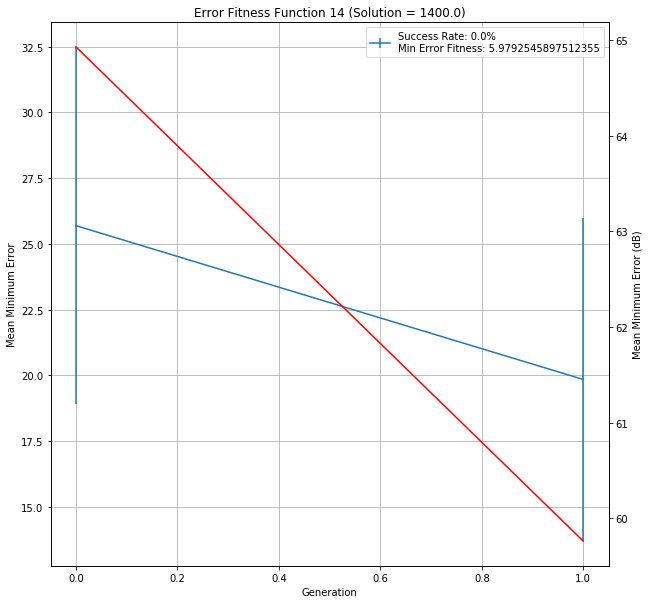

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.01,24.507566,19.070931,27.769974,24.689227,13.154434,23.388608,...,19.758388,23.98419,19.347341,10.417672,13.228974,24.493166,10.5633,19.848935,0:02:14,1200
